# Visualize Depth `.bin` Files

This notebook demonstrates how to load and visualize depth data saved as `.bin` files (e.g., from VisionCamera on iOS). These files typically contain 32-bit float values in row-major order.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os

def load_depth_bin(path, dims):
    """
    Load a depth .bin file as a numpy array.

    Args:
        path (str): Path to the .bin file.
        dims (tuple): (height, width) of the depth image.

    Returns:
        np.ndarray: 2D array of depth values.
    """
    with open(path, 'rb') as f:
        arr = np.frombuffer(f.read(), dtype=np.float32)
    arr = arr.reshape(dims)
    return arr

In [18]:
# Example usage:
# Set the path to your .bin file and the dimensions (height, width)
depth_bin_path = "20125176-44CA-46E2-916F-F8D571DADC2C.depth.bin"  # Update this to your file path
depth_dims = (432, 768)  # Update this to your depth image dimensions

if os.path.exists(depth_bin_path):
    depth = load_depth_bin(depth_bin_path, depth_dims)
    print(f"Loaded depth map with shape: {depth.shape}")
else:
    print("Depth file not found. Please update the path.")

Loaded depth map with shape: (432, 768)


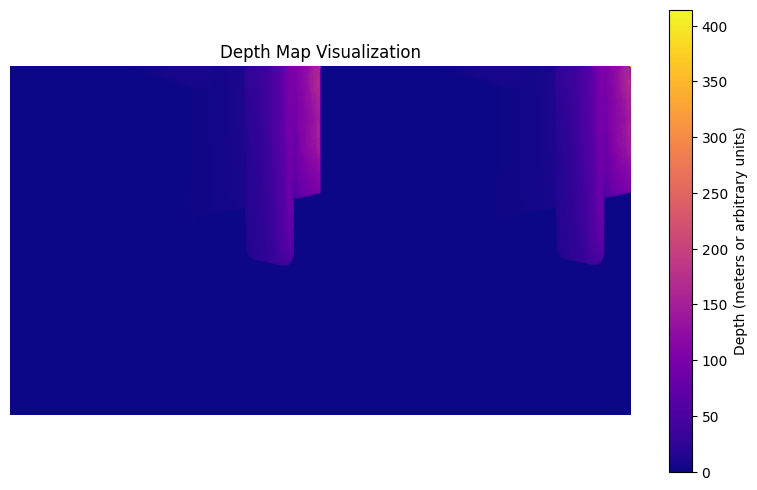

In [19]:
# Visualize the depth map
if 'depth' in locals():
    plt.figure(figsize=(10, 6))
    plt.imshow(depth, cmap='plasma')
    plt.colorbar(label='Depth (meters or arbitrary units)')
    plt.title('Depth Map Visualization')
    plt.axis('off')
    plt.show()

## Notes

- If your depth values are not in meters, adjust the colorbar label accordingly.
- You can use different colormaps (e.g., `viridis`, `inferno`, `gray`) for visualization.
- If the image appears flipped or rotated, you can use `np.flipud`, `np.fliplr`, or `np.transpose` to adjust orientation.

In [22]:
# Debug: Check the size of the loaded array and suggest possible shapes
if os.path.exists(depth_bin_path):
    arr = np.fromfile(depth_bin_path, dtype=np.float32)
    print(f"Array size: {arr.size}")
    # Try to suggest possible shapes
    for w in [768, 384, 256, 192]:
        if arr.size % w == 0:
            h = arr.size // w
            print(f"Possible shape: ({h}, {w})")
    # You can try to reshape with one of these shapes
else:
    print("Depth file not found. Please update the path.")

Array size: 331776
Possible shape: (432, 768)
Possible shape: (864, 384)
Possible shape: (1296, 256)
Possible shape: (1728, 192)


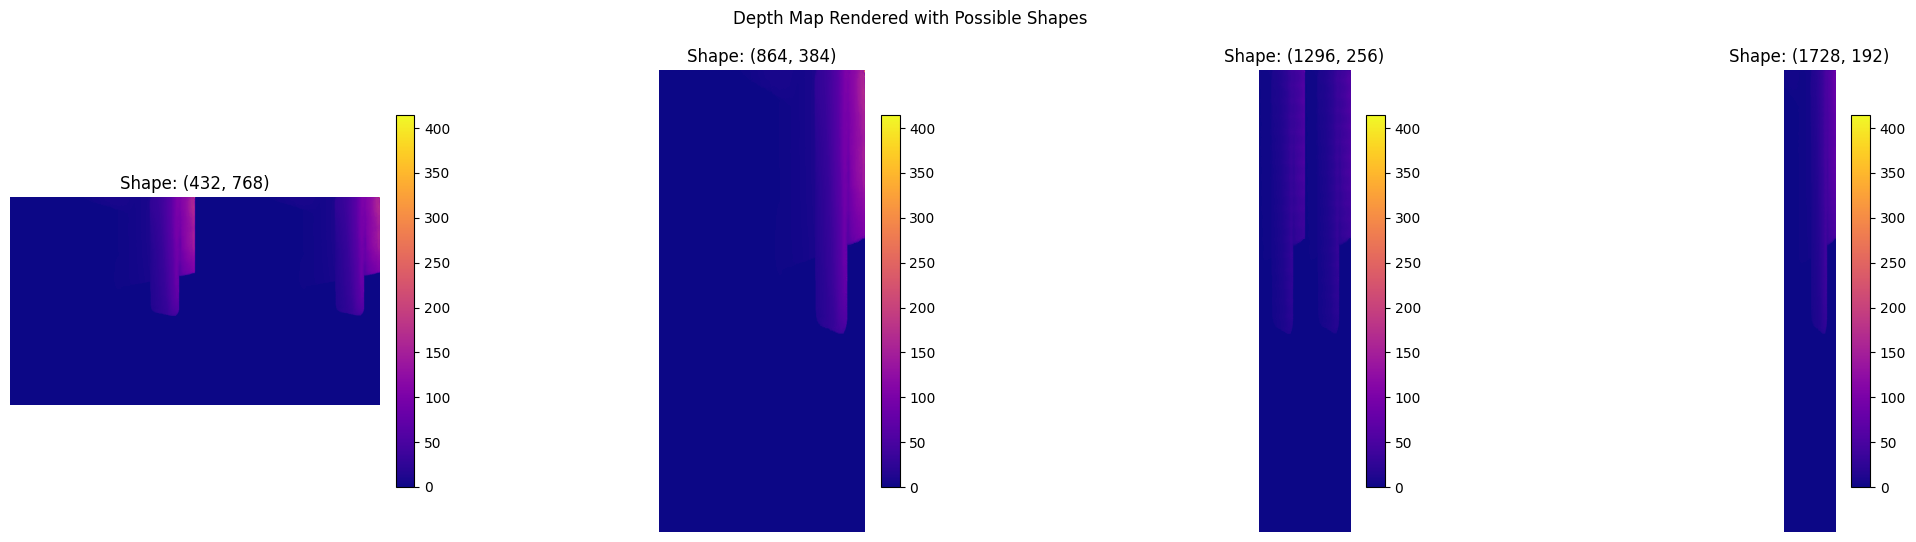

In [23]:
# Try rendering the file with each possible shape in subplots
if os.path.exists(depth_bin_path):
    arr = np.fromfile(depth_bin_path, dtype=np.float32)
    possible_shapes = []
    for w in [768, 384, 256, 192]:
        if arr.size % w == 0:
            h = arr.size // w
            possible_shapes.append((h, w))
    if possible_shapes:
        fig, axes = plt.subplots(1, len(possible_shapes), figsize=(6 * len(possible_shapes), 6))
        if len(possible_shapes) == 1:
            axes = [axes]
        for ax, shape in zip(axes, possible_shapes):
            try:
                img = arr.reshape(shape)
                im = ax.imshow(img, cmap='plasma')
                ax.set_title(f"Shape: {shape}")
                ax.axis('off')
                plt.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
            except Exception as e:
                ax.set_title(f"Failed: {shape}\n{e}")
                ax.axis('off')
        plt.suptitle("Depth Map Rendered with Possible Shapes")
        plt.show()
    else:
        print("No possible shapes found.")
else:
    print("Depth file not found. Please update the path.")